In [4]:
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.manifold import TSNE

C:\app\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec.load('docembeddings_dim_250_window_10')

C:\app\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [6]:
labels_file_path = "" # path to labels file "io_data.csv"
labels_df = pd.read_csv(labels_file_path)

In [7]:
with open('Doc2Vec_X_data.pkl', 'rb') as f:
    X_data = pickle.load(f)
with open('Doc2Vec_y_data_all_toxicity.pkl', 'rb') as f:
    y_data = pickle.load(f)
with open('Doc2Vec_y_data_colitis.pkl', 'rb') as f:
    y_data_colitis = pickle.load(f)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_pred = gnb.predict(X_test)

In [61]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [62]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6410256410256411


In [40]:
X_data_2d = TSNE(n_components=2, method='barnes_hut').fit_transform(X_data)

In [41]:
def label_vectors_pos_neg(X_data, y_data):
    ''' The data should be 2 dimensional. The y_data_tox should be for only one toxicity '''
    print('0 represented by red')
    print('1 represented by green')
    for row in range(X_data.shape[0]):
        xy_pair = X_data[row]
        xpt, ypt = tuple(xy_pair.tolist())
        if y_data[row].tolist() == 0:
            plt.plot(xpt, ypt, 'ro')
        else:
            plt.plot(xpt, ypt, 'go')

0 represented by red
1 represented by green


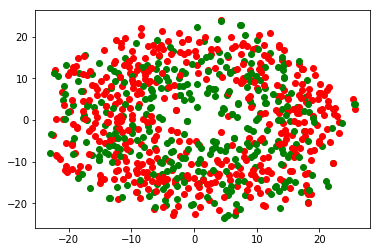

In [42]:
label_vectors_pos_neg(X_data_2d, y_data) # clearly there is a lot of overlap between both classes